In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
sales=pd.read_csv('sales.csv')
brand=pd.read_csv('brand_keyword_cnt.csv')
product_info=pd.read_csv('product_info.csv')

In [3]:
df=pd.read_csv('feature_aug_after_human_revised_1_realfinal.csv')
df.head(3)

,id,id.1,헤어타입,형태,특징,용량,unit,생균,섭취량,제품용량,...,외장메모리,코어,터치,제조사,펜,키보드,ppi,3,human_imputed,human_imputed_proba
0,0,0,모든,스프레이형,머릿결개선,30ml(g),1개,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,남녀공용,0.496507
1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.700165
2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.673810


In [62]:
df.columns

Index(['ID', '제품', '대분류', '중분류', '소분류', '브랜드', 'id', '헤어타입', '형태', '특징',
       ...
       '외장메모리', '코어', '터치', '제조사', '펜', '키보드', 'ppi', '3', 'human_imputed',
       'human_imputed_proba'],
      dtype='object', length=515)

In [4]:
df_re=df.rename(columns={'id.1':'ID'})
df_re.head(3)

,id,ID,헤어타입,형태,특징,용량,unit,생균,섭취량,제품용량,...,외장메모리,코어,터치,제조사,펜,키보드,ppi,3,human_imputed,human_imputed_proba
0,0,0,모든,스프레이형,머릿결개선,30ml(g),1개,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,남녀공용,0.496507
1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.700165
2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.673810


In [5]:
df=train[['ID','제품','대분류','중분류','소분류','브랜드']].merge(df_re)
df

,ID,제품,대분류,중분류,소분류,브랜드,id,헤어타입,형태,특징,...,외장메모리,코어,터치,제조사,펜,키보드,ppi,3,human_imputed,human_imputed_proba
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,모든,스프레이형,머릿결개선,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,남녀공용,0.496507
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.700165
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.673810
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.702248
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.707484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12263,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,12263,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.677503
12264,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,12264,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.672107
12265,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,12265,NaN,NaN,전자레인지사용,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.831227
12266,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,12266,NaN,NaN,전자레인지사용,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.833593


In [6]:
df.sort_values("헤어타입")

,ID,제품,대분류,중분류,소분류,브랜드,id,헤어타입,형태,특징,...,외장메모리,코어,터치,제조사,펜,키보드,ppi,3,human_imputed,human_imputed_proba
1521,2031,B002-00487-00002,B002-C001-0002,B002-C002-0007,B002-C003-0040,B002-00487,1521,가는,무스형,머릿결개선,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.530530
646,840,B002-00242-00004,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00242,646,가는,로션형,머릿결개선,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,남녀공용,0.542932
6887,9035,B002-02126-00003,B002-C001-0002,B002-C002-0007,B002-C003-0040,B002-02126,6887,가는,펌프형,머릿결개선,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,남녀공용,0.469760
1332,1797,B002-00434-00120,B002-C001-0002,B002-C002-0007,B002-C003-0037,B002-00434,1332,가는,펌프형,머릿결개선,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.745769
1808,2372,B002-00584-00011,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00584,1808,가는,오일형,머릿결개선,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,남녀공용,0.704511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12263,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,12263,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.677503
12264,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,12264,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.672107
12265,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,12265,NaN,NaN,전자레인지사용,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.831227
12266,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,12266,NaN,NaN,전자레인지사용,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,미성년자,0.833593


In [7]:
df[['ID','human_imputed']]

,ID,human_imputed
0,0,남녀공용
1,1,미성년자
2,2,미성년자
3,3,미성년자
4,4,미성년자
...,...,...
12263,15885,미성년자
12264,15886,미성년자
12265,15887,미성년자
12266,15888,미성년자


In [8]:
df_all=df[['ID','human_imputed']].merge(train)
df_all

,ID,human_imputed,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,남녀공용,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,미성년자,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,미성년자,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,미성년자,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,미성년자,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12263,15885,미성년자,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12264,15886,미성년자,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,...,0,0,0,3,0,2,4,1,1,3
12265,15887,미성년자,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12266,15888,미성년자,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [9]:
df_long=df_all.melt(
    id_vars=['ID','human_imputed','제품','대분류','중분류','소분류','브랜드'],
    var_name='date',
    value_name='판매량'
)
df_long

,ID,human_imputed,제품,대분류,중분류,소분류,브랜드,date,판매량
0,0,남녀공용,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,2022-01-01,0
1,1,미성년자,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,2022-01-01,0
2,2,미성년자,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,2022-01-01,0
3,3,미성년자,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,2022-01-01,0
4,4,미성년자,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,2022-01-01,0
...,...,...,...,...,...,...,...,...,...
5631007,15885,미성년자,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,2023-04-04,0
5631008,15886,미성년자,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,2023-04-04,3
5631009,15887,미성년자,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,2023-04-04,0
5631010,15888,미성년자,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,2023-04-04,2


In [10]:
idx=df_long['date'].isin( ['2022-01-01','2022-01-31','2022-02-01','2022-02-02','2022-03-01','2022-03-09','2022-05-05','2022-05-08','2022-06-01','2022-06-06','2022-08-15','2022-09-09','2022-09-10','2022-09-11','2022-09-12',
                       '2022-10-03','2022-10-09','2022-10-10','2022-12-25','2023-01-21','2023-01-22','2023-01-23','2023-01-24',
                      '2023-03-01','2023-04-05'])

In [11]:
def clean_data(df):
    df.rename({"dteday": "date", "cnt": "count"}, axis=1, inplace=True)
    df["date"] = pd.to_datetime(df["date"])  

    df["year"] = df["date"].dt.year
    df["day"] = df["date"].dt.day_of_year
    df['Day'] = df['date'].dt.day

    return df

df_long=clean_data(df_long)
df_long = df_long.assign(
    wday = lambda x: x["date"].dt.day_name().str[:3],
    month = lambda x: x["date"].dt.month_name().str[:3],
    year = lambda x: x["date"].dt.year.astype(str),
    day = lambda x: x["date"].dt.day_of_year,
    Day = lambda x: x["date"].dt.day,
    holiday = lambda x: np.where(idx, 'Yes', 'No')
)
df_long.head(3)

,ID,human_imputed,제품,대분류,중분류,소분류,브랜드,date,판매량,year,day,Day,wday,month,holiday
0,0,남녀공용,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,2022-01-01,0,2022,1,1,Sat,Jan,Yes
1,1,미성년자,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,2022-01-01,0,2022,1,1,Sat,Jan,Yes
2,2,미성년자,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,2022-01-01,0,2022,1,1,Sat,Jan,Yes


In [12]:
df_long.value_counts('human_imputed')

human_imputed
미성년자    5233059
남녀공용     302481
성인남녀      95472
dtype: int64

대부분의 상품이 미성년자임.

In [13]:
df_long.groupby(['date','human_imputed'])['판매량'].mean().reset_index().rename

<bound method DataFrame.rename of            date human_imputed        판매량
0    2022-01-01          남녀공용   3.664643
1    2022-01-01          미성년자  11.844487
2    2022-01-01          성인남녀  16.596154
3    2022-01-02          남녀공용   3.113809
4    2022-01-02          미성년자   8.143058
...         ...           ...        ...
1372 2023-04-03          미성년자   9.051399
1373 2023-04-03          성인남녀  23.706731
1374 2023-04-04          남녀공용   2.779970
1375 2023-04-04          미성년자   9.443645
1376 2023-04-04          성인남녀  16.644231

[1377 rows x 3 columns]>

In [14]:
df_long=df_long.replace({'미성년자':'minor','남녀공용':'unisex','성인남녀':'adults'})
df_long.head(3)

,ID,human_imputed,제품,대분류,중분류,소분류,브랜드,date,판매량,year,day,Day,wday,month,holiday
0,0,unisex,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,2022-01-01,0,2022,1,1,Sat,Jan,Yes
1,1,minor,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,2022-01-01,0,2022,1,1,Sat,Jan,Yes
2,2,minor,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,2022-01-01,0,2022,1,1,Sat,Jan,Yes


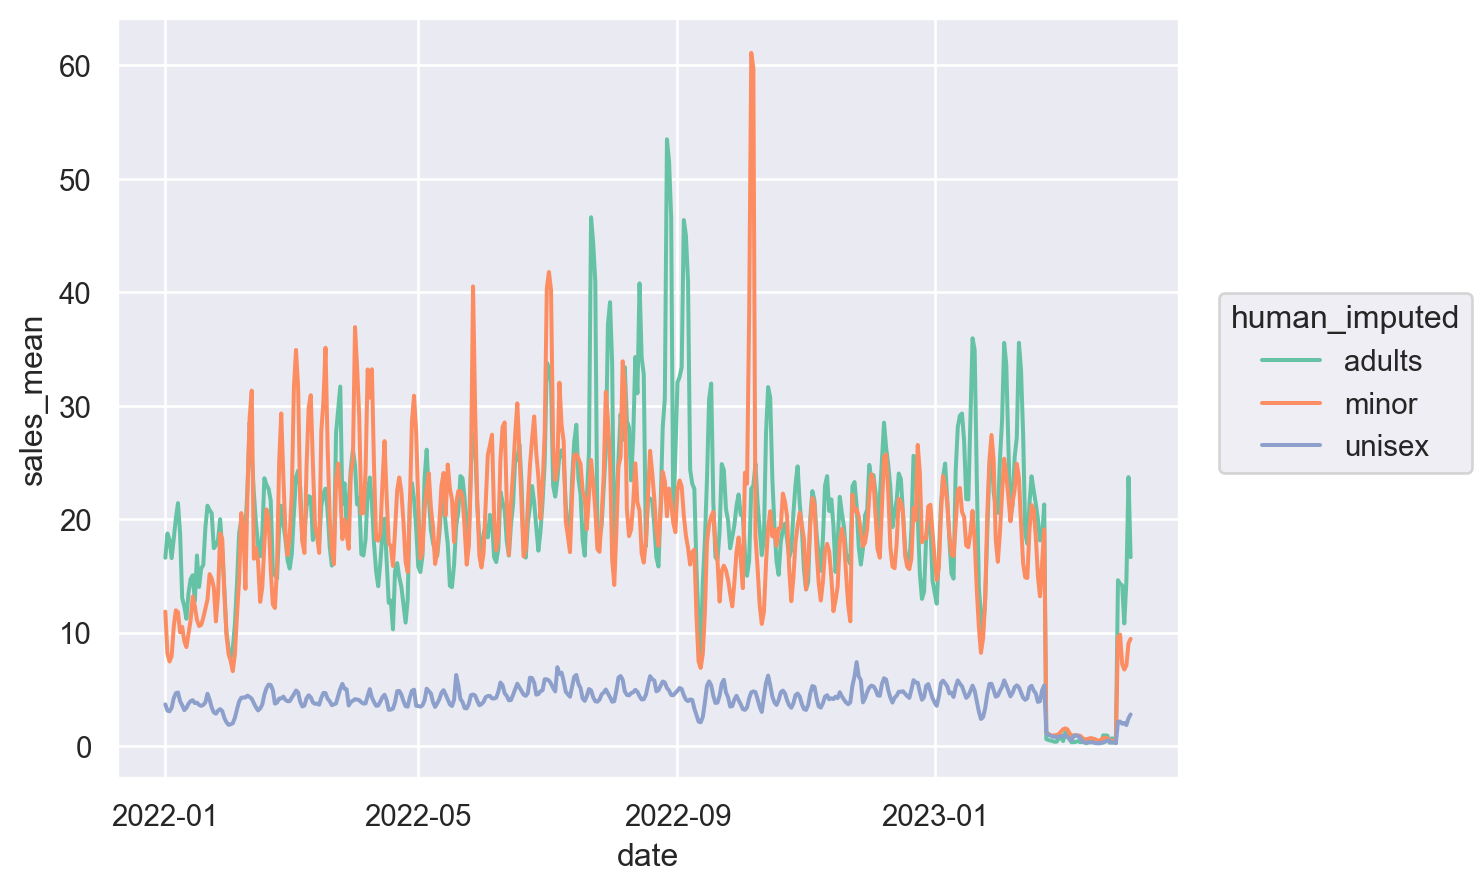

In [16]:
(
     so.Plot(df_long.groupby(['date','human_imputed'])['판매량'].mean().reset_index(),x='date',y='판매량',color='human_imputed')
    .add(so.Line())
    .scale(color='Set2')
    .label(y='sales_mean')
)

In [47]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Serif',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXGeneral',
 'cmmi10',
 'DejaVu Serif',
 'cmr10',
 'STIXSizeThreeSym',
 'cmsy10',
 'STIXNonUnicode',
 'cmb10',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'cmss10',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'cmtt10',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXSizeOneSym',
 'cmex10',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'Segoe UI',
 'Candara',
 'Ebrima',
 'Georgia',
 'Ami R',
 'Arial',
 'Garamond',
 'Times New Roman',
 'New Gulim',
 'French Script MT',
 'HYGothic-Medium',
 'Franklin Gothic Book',
 'HYkanB',
 'Lucida Fax',
 'Gill Sans MT Condensed',
 'NanumSquareRoundOTF',
 'Wingdings 3',
 'YJ BELLA Medium',
 'OCR A Extended',
 'Segoe UI',
 'Garamond',
 'S

In [48]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [37]:
from prophet import Prophet

In [43]:
data

2022-01-01    12.887476
2022-01-02    10.418880
2022-01-03     9.013090
2022-01-04     9.190938
2022-01-05    11.204216
                ...    
2023-02-18    17.036123
2023-02-19    14.584330
2023-02-20    12.995280
2023-02-21    15.487665
2023-02-22    17.989239
Length: 418, dtype: float64

In [39]:
data = train.loc[:,'2022-01-01':'2023-02-22'].mean()
series = data.reset_index()
series.columns = ['ds','y']
series.head(3)

,ds,y
0,2022-01-01,12.887476
1,2022-01-02,10.418880
2,2022-01-03,9.013090


21:42:50 - cmdstanpy - INFO - Chain [1] start processing
21:42:51 - cmdstanpy - INFO - Chain [1] done processing


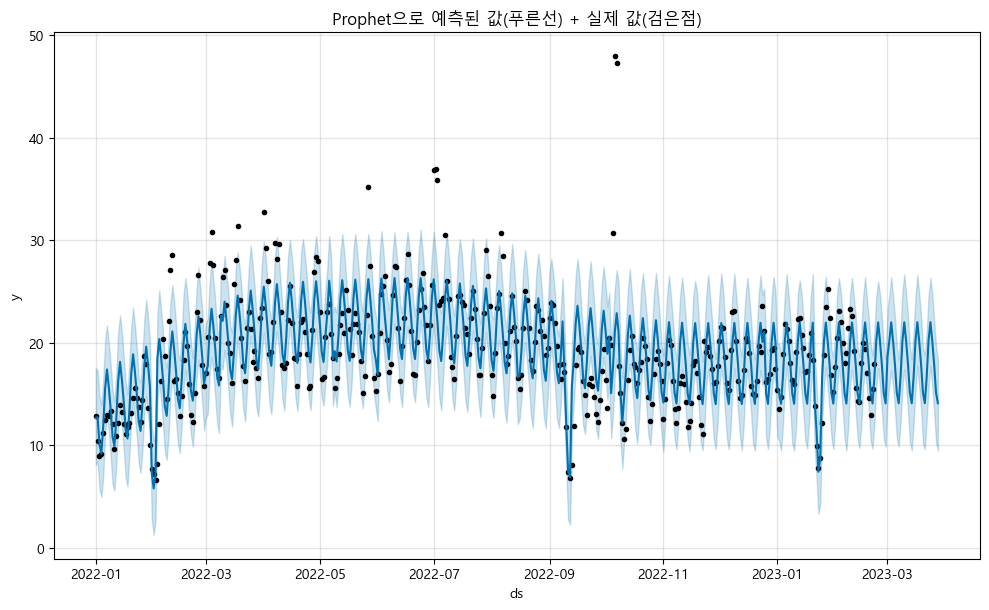

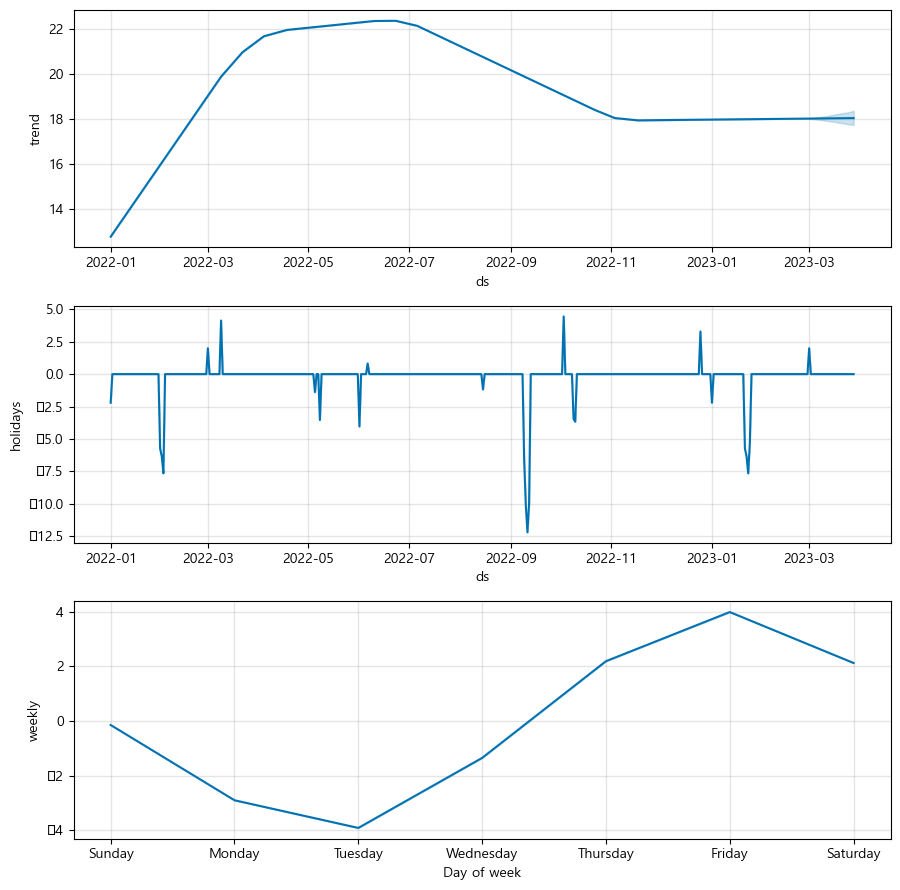

In [53]:
m=Prophet()
m.add_country_holidays(country_name='KR')
m.fit(series)

future = m.make_future_dataframe(periods = 34)
forecast = m.predict(future)

fig1 = m.plot(forecast)
plt.title('Prophet으로 예측된 값(푸른선) + 실제 값(검은점)')
fig2 = m.plot_components(forecast)
plt.show()

23:25:24 - cmdstanpy - INFO - Chain [1] start processing
23:25:24 - cmdstanpy - INFO - Chain [1] done processing


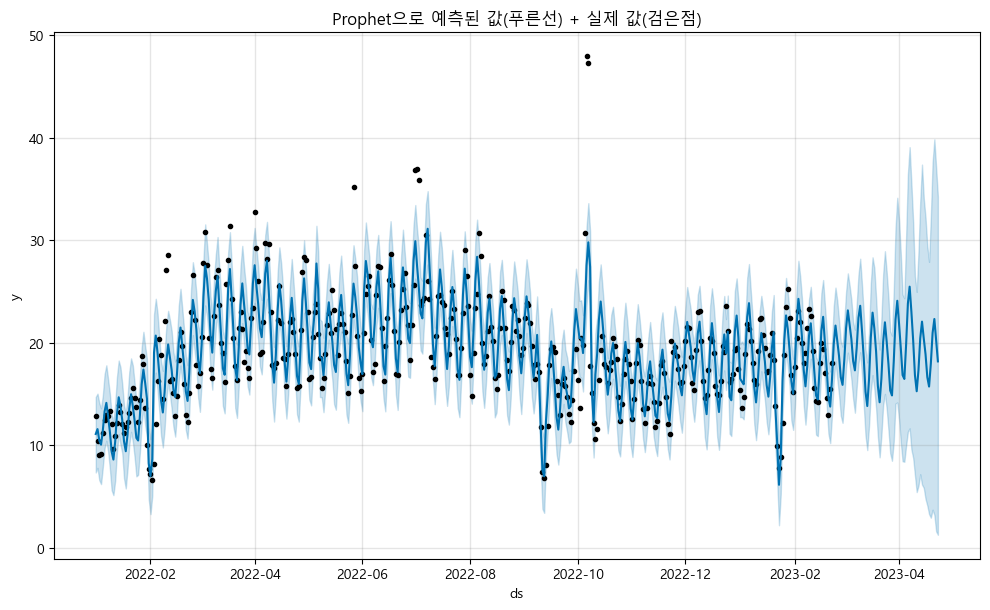

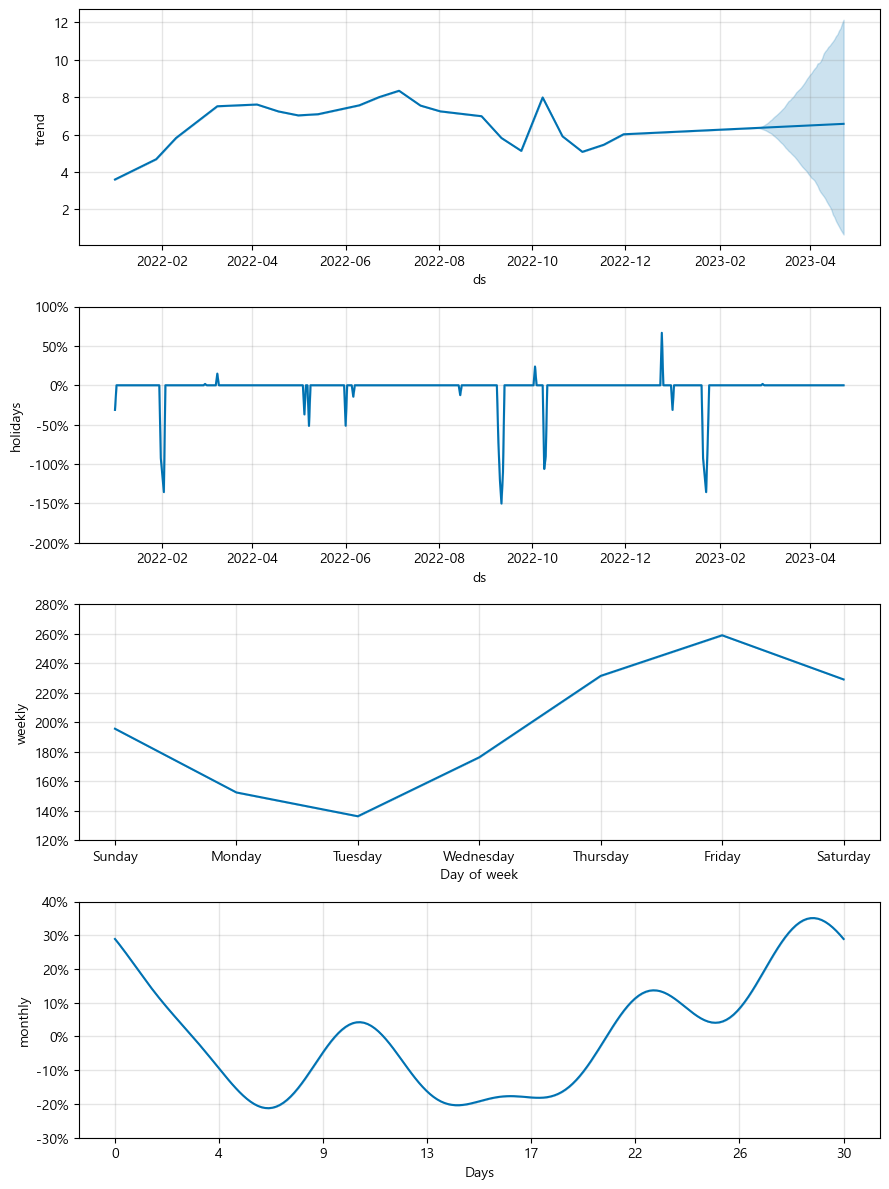

In [63]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.8,
    # seasonality
    seasonality_prior_scale = 0.45,
    weekly_seasonality = 20,
    daily_seasonality=False,
    yearly_seasonality=False,
    seasonality_mode='multiplicative'
)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_country_holidays(country_name='KR')
m.fit(series)

future = m.make_future_dataframe(periods = 60)
forecast = m.predict(future)

fig1 = m.plot(forecast)
plt.title('Prophet으로 예측된 값(푸른선) + 실제 값(검은점)')
fig2 = m.plot_components(forecast)
plt.show()

21:42:57 - cmdstanpy - INFO - Chain [1] start processing
21:42:57 - cmdstanpy - INFO - Chain [1] done processing


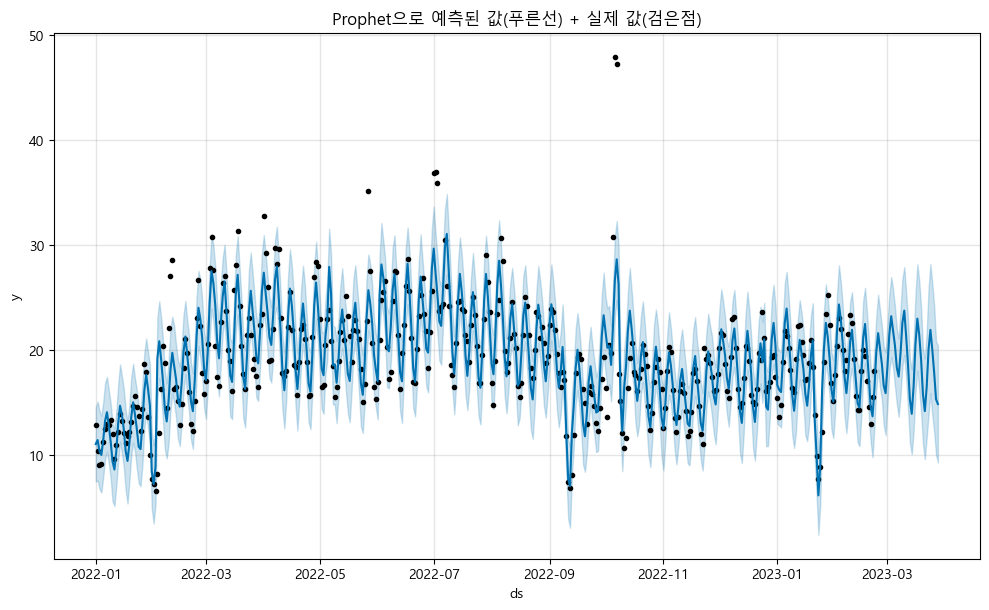

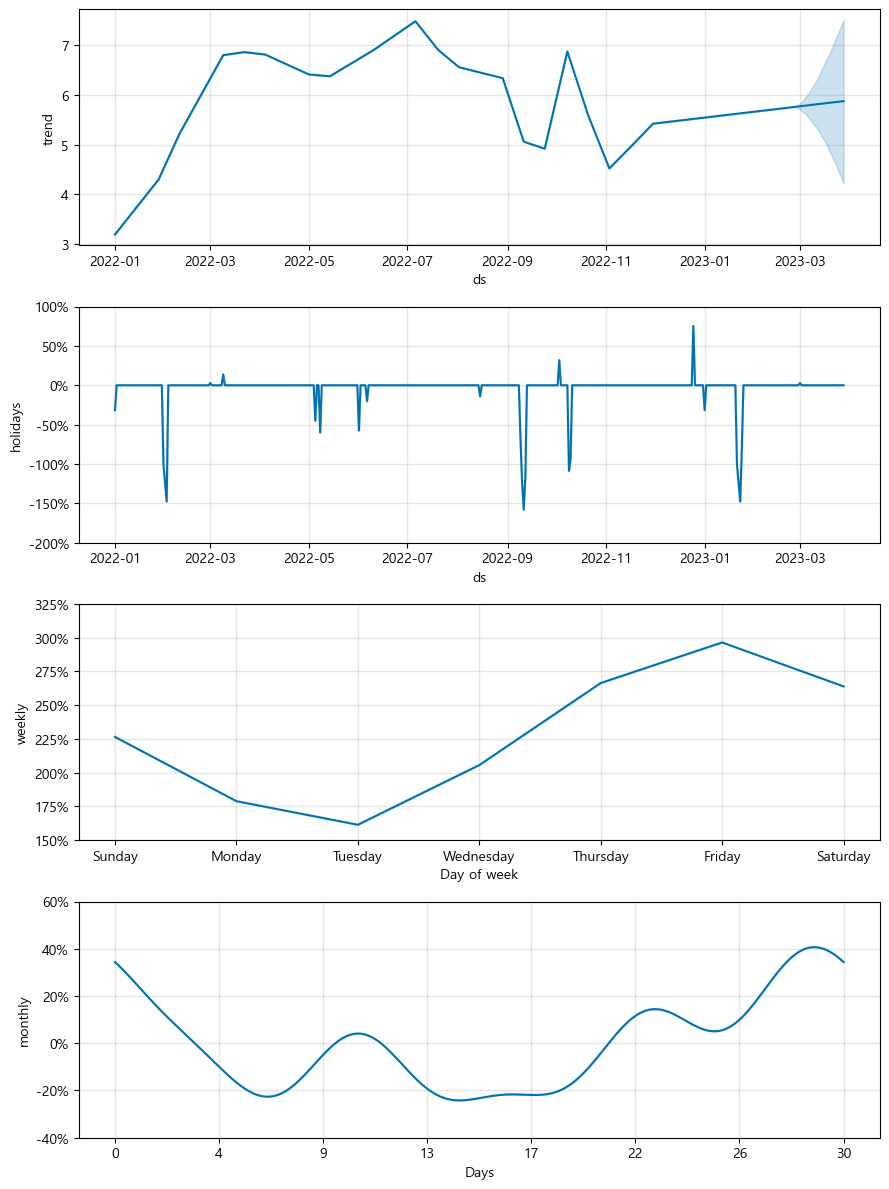

In [54]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.5,
    # seasonality
    seasonality_prior_scale = 0.5,
    weekly_seasonality = 20,
    daily_seasonality=False,
    yearly_seasonality=False,
    seasonality_mode='multiplicative'
)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_country_holidays(country_name='KR')
m.fit(series)

future = m.make_future_dataframe(periods = 34)
forecast = m.predict(future)

fig1 = m.plot(forecast)
plt.title('Prophet으로 예측된 값(푸른선) + 실제 값(검은점)')
fig2 = m.plot_components(forecast)
plt.show()

In [42]:
yhat = forecast.loc[forecast['ds'] >= '2023-02-23','yhat']
yhat = yhat.astype(int)
yhat

418    19
419    21
420    20
421    18
422    16
423    15
424    18
425    21
426    23
427    21
428    20
429    18
430    17
431    19
432    22
433    23
434    21
435    18
436    15
437    13
438    16
439    20
440    22
441    21
442    19
443    15
444    14
445    16
446    20
447    21
448    20
449    17
450    15
451    14
Name: yhat, dtype: int32